<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter2/Air%20Pollution.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# In pandas you can pass the url directly into read_csv()
pollution = pd.read_csv(
    'C:\\Users\\HP\\documents\\dev\\Machine-Learning-for-Time-Series-with-Python\\Dataset\\Air_pollution_by_city.csv'
)

In [8]:
pollution.columns

Index(['Entity', 'Year', 'Smoke (Fouquet and DPCC (2011))',
       'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))'],
      dtype='object')

In [9]:
pollution.head()

,Entity,Year,Smoke (Fouquet and DPCC (2011)),Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0


In [10]:
pollution = pollution.rename(
    columns={
        'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))': 'SPM',
        'Entity': 'City',
        'Smoke (Fouquet and DPCC (2011))' : 'Smoke'
    }
)

In [11]:
pollution.dtypes

City      object
Year       int64
Smoke    float64
SPM      float64
dtype: object

In [12]:
pollution['City'].unique()

array(['Delhi', 'London'], dtype=object)

In [13]:
pollution.Year.min(), pollution.Year.max()

(1700, 2016)

In [14]:
# careful: pollution['Year'] = pd.to_datetime(pollution['Year'])
# pandas doesn't handle dates before 1900!
pollution['Year'] = pollution['Year'].apply(
    lambda x: datetime.datetime.strptime(str(x), '%Y')
)

The apply method is called on the 'Year' column, which applies a function to each element in the column.
The function used is a lambda that takes each value x, converts it to a string (in case it's not already), and then parses it using datetime.datetime.strptime with the format '%Y'. This format expects a four-digit year (like '2020').
As a result, each entry in the 'Year' column is transformed from an integer or string (e.g., 2020 or '2020') into a datetime object (e.g., datetime.datetime(2020, 1, 1, 0, 0)).

In [15]:
pollution.Year.min(), pollution.Year.max()

(Timestamp('1700-01-01 00:00:00'), Timestamp('2016-01-01 00:00:00'))

In [16]:
pollution.isnull().sum() / len(pollution)

City     0.000000
Year     0.000000
Smoke    0.090634
SPM      0.000000
dtype: float64

In [17]:
pollution.describe()

,Year,Smoke,SPM
count,331,301.000000,331.000000
mean,1864-02-26 13:37:53.111782400,210.296440,365.970050
min,1700-01-01 00:00:00,13.750000,15.000000
25%,1782-07-02 12:00:00,168.571429,288.474026
50%,1865-01-01 00:00:00,208.214286,375.324675
75%,1947-07-02 12:00:00,291.818182,512.609209
max,2016-01-01 00:00:00,342.857143,623.376623
std,NaN,88.543288,172.512674


This code creates a histogram to visualize the distribution of Suspended Particulate Matter (SPM) values from the pollution DataFrame. The plt.hist function is used to plot the histogram, where the x parameter is set to the 'SPM' column. The bins='auto' argument lets matplotlib automatically determine the optimal number of bins based on the data. The alpha=0.7 parameter sets the transparency of the bars, making them slightly see-through, and rwidth=0.85 adjusts the relative width of the bars to leave some space between them for better readability.

The output of plt.hist is unpacked into three variables: n (the counts in each bin), bins (the bin edges), and patches (the graphical representations of the bars). After plotting the histogram, plt.grid(axis='y', alpha=0.75) adds a semi-transparent grid along the y-axis to make it easier to read the frequencies. Finally, plt.xlabel('SPM') and plt.ylabel('Frequency') label the x-axis and y-axis, respectively, making the plot more informative and easier to interpret. This visualization helps you quickly understand how SPM values are distributed in your dataset.

Text(0, 0.5, 'Frequency')

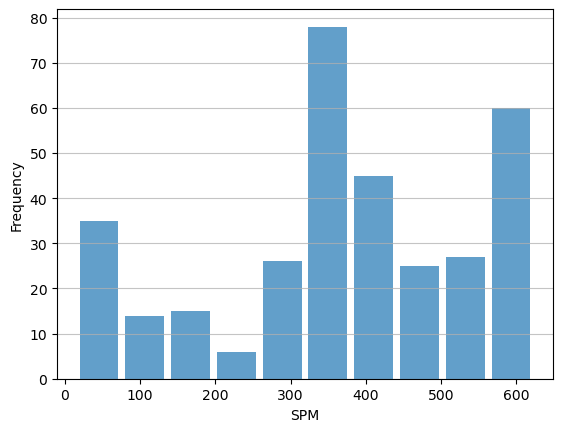

In [18]:
import numpy as np
n, bins, patches = plt.hist(
    x=pollution['SPM'], bins='auto',
    alpha=0.7, rwidth=0.85
)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('SPM')
plt.ylabel('Frequency')

This code creates a detailed visualization to explore the relationship between the 'Smoke' and 'SPM' (Suspended Particulate Matter) columns in the pollution DataFrame. First, plt.figure(figsize=(12, 6)) sets up a new figure with a width of 12 inches and a height of 6 inches, ensuring the plot has ample space for clarity.

Next, sns.jointplot from the seaborn library generates a joint plot, which combines a scatter plot of 'Smoke' versus 'SPM' with histograms (or density plots) of each variable along the top and right margins. The edgecolor='white' argument makes the edges of the scatter points white, improving their visibility, especially when points overlap. The data=pollution argument tells seaborn to use the pollution DataFrame as the data source.

Finally, plt.xlabel('Smoke') and plt.ylabel('SPM') label the x-axis and y-axis, respectively, making the plot easier to interpret. This visualization is useful for quickly assessing both the correlation between 'Smoke' and 'SPM' and the distribution of each variable individually. One subtle point is that sns.jointplot creates its own figure, so the explicit call to plt.figure is not strictly necessary and may not affect the joint plot as intended.

<Figure size 1200x600 with 0 Axes>

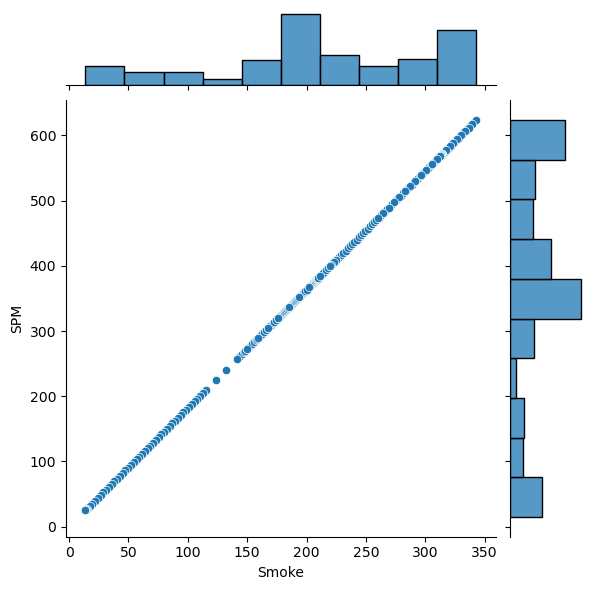

In [19]:
plt.figure(figsize=(12, 6))
sns.jointplot(
    x='Smoke', y='SPM',
    edgecolor='white',
    data=pollution
)
plt.xlabel('Smoke')
plt.ylabel('SPM');

In the scatter plt, two variables are extremely similar - the values are all on the diagonal, the correlation between these two variables is perfect 1.0, which means that they are in fact identical.

In [20]:
from scipy import stats


def ignore_nans(a, b):
    index = ~a.isnull() & ~b.isnull()
    return a[index], b[index]

stats.pearsonr(*ignore_nans(pollution['Smoke'], pollution['SPM']))

PearsonRResult(statistic=1.0, pvalue=0.0)

In [21]:
pollution.dtypes

City             object
Year     datetime64[ns]
Smoke           float64
SPM             float64
dtype: object

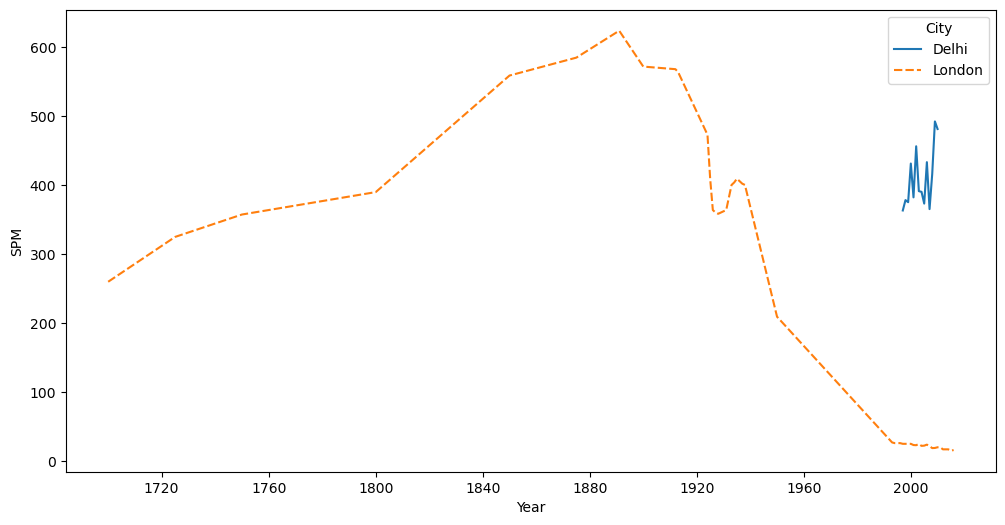

In [22]:
pollution = pollution.pivot(index="Year", columns="City", values="SPM")
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution)
plt.ylabel('SPM');

autocorrelation plot shows how the values in a time series are correlated with their own past values at different lags. Peaks in the plot indicate strong relationships between current and past values at specific time intervals. This type of plot is useful for identifying repeating patterns, trends, or seasonality in time series data, and can help inform further modeling or forecasting steps. The plot also includes confidence bands, which help you judge whether the observed correlations are statistically significant.

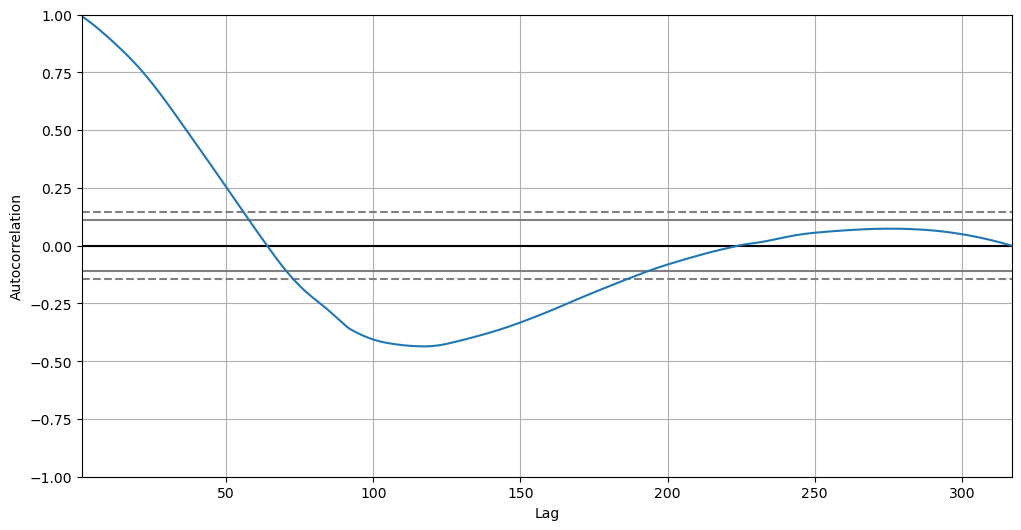

In [23]:
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(pollution['London']);

In [24]:
from statsmodels.tsa import stattools

stattools.adfuller(pollution['London'])

(-0.3372164080424387,
 0.9200654843183882,
 13,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1684.699266349387)

In [25]:
from scipy import stats

stats.pearsonr(pollution['London'], pollution.index.values.astype(int))

PearsonRResult(statistic=-0.0013835903002221393, pvalue=0.9804244126809252)

In [26]:
stats.spearmanr(pollution['London'][:180], pollution.index.values.astype(int)[:180])

SignificanceResult(statistic=0.0003333436217167196, pvalue=0.9964565130656107)